# Model Analisys
## For the analysis of the Toxic users in twitter we made the respective EDA, where we find features that will be useful in the models we use below.

In [1]:
#Author: Marlon Segarra
#Librerias usadas
library(MASS)
library(caTools)
library(caret)
library(ROCR)
library(ggplot2)
#Visualizacion de los datos
setwd("C:/Users/LENOVO/Desktop/Proyecto-Mineria/")
tweets<-read.csv("toxic_tweets.csv")
tweets<-tweets[c(1,2,3,4,7,5,6,14,8,9,10,11,12,13)]
tweets[1:10,]
tweets$mentions<-as.numeric(tweets$mentions)
tweets$num_bad_words<-as.numeric(tweets$num_bad_words)
tweets$toxic<-as.numeric(tweets$toxic)
set.seed(1234)
str(tweets)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



timestamp,timestamp.1,screen_name,text,Tweet_lemmatized,mentions,sentiment,num_bad_words,toxic,severe_toxic,obscene,threat,identity_hate,insult
2012-01-28 16:10:53,2012-01-28 16:10:53,LeninArtieda,"bajaron de Ciudad Alfaro a Montecristi. Algunos se quedaron escuchando al Presidente, otros se fueron.","['', 'ciudad', 'alfaro', 'montecristi', 'quedaron', 'escuchando', 'presidente']",1,0.0000,0,0,0,0,0,0,0
2012-01-28 16:19:50,2012-01-28 16:19:50,javi_300,Me parece raro que hayan planificado un show al mismo tiempo de la sabatina ya q es obvio q todos iban a ir pa alla,"['', 'parece', 'raro', 'planificado', 'show', 'mismo', 'tiempo', 'sabatina', 'obvio', 'iban', 'ir', 'pa', 'alla']",2,0.0000,0,0,0,0,0,0,0
2012-07-23 16:52:04,2012-07-23 16:52:04,ElGuille1981,"jajaja estamos en la mierda, maldita llegada de los 30","['', 'mierda', 'maldita', 'llegada', '']",2,0.0000,1,0,0,0,0,0,1
2012-07-30 21:08:59,2012-07-30 21:08:59,OmarVLuna,Bien Gongora!!!,"['bien', 'gongora']",0,0.0000,0,0,0,0,0,0,0
2012-08-12 23:33:07,2012-08-12 23:33:07,Ceagd,RT Arroyo gana pelota a GimÃ©nez y Gol de DÃ­az; desde la lejanÃ­a derechazo memorable..21'// memorable ab,"['arroyo', 'gana', 'pelota', 'gimÃ©nez', 'gol', 'dÃ­az', 'derechazo', 'memorable', 'memorable']",1,0.0000,0,0,0,0,0,0,0
2012-09-23 19:51:49,2012-09-23 19:51:49,williamludena,Saludos hermano!,"['', 'saludos', 'hermano']",1,0.0000,0,0,0,0,0,0,0
2012-10-10 11:39:41,2012-10-10 11:39:41,rhernandeztv,"Glad to hear fom you,","['glad', 'to', 'hear', 'fom', 'you', '']",1,0.4588,0,0,0,0,0,0,0
2013-02-24 01:03:20,2013-02-24 1:03:20,egasic,de q vale la libertadores si en el campeonato stamos n la mierda ese Castillejos es una dsgracia,"['', 'vale', 'libertadores', 'si', 'campeonato', 'stamos', 'n', 'mierda', 'castillejos', 'dsgracia']",3,0.0000,1,1,0,0,0,0,0
2013-04-11 12:30:24,2013-04-11 12:30:24,ivonnelago,Para ser estÃºpido y descriteriado no se necesita estudiar.,"['ser', 'estÃºpido', 'descriteriado', 'necesita', 'estudiar']",0,-0.2960,0,0,0,0,0,0,1
2013-08-18 04:13:45,2013-08-18 4:13:45,christianalban,Ser bueno no es sinÃ³nimo de ser idiota. Ser bueno es una virtud que algunos idiotas no entienden.,"['ser', 'bueno', 'sinÃ³nimo', 'ser', 'idiota', 'ser', 'bueno', 'virtud', 'idiotas', 'entienden']",0,-0.5267,0,0,0,0,0,0,1


'data.frame':	600 obs. of  14 variables:
 $ timestamp       : Factor w/ 597 levels "2012-01-28 16:10:53",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ timestamp.1     : Factor w/ 597 levels "2012-01-28 16:10:53",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ screen_name     : Factor w/ 507 levels "_fbsc","_iXiomara",..: 297 250 171 381 98 496 431 164 247 116 ...
 $ text            : Factor w/ 597 levels "        https://t.co/lMybQxmSU1",..: 213 126 107 500 572 424 533 36 560 578 ...
 $ Tweet_lemmatized: Factor w/ 595 levels "['', '']","['', 'Ã¡rbitro', 'hdp', 'mierda', 'inciden', 'marcador', 'si', 'seguro', 'meta', 'bandera', 'c', '']",..: 81 313 275 495 484 396 527 452 573 572 ...
 $ mentions        : num  1 2 2 0 1 1 1 3 0 0 ...
 $ sentiment       : num  0 0 0 0 0 ...
 $ num_bad_words   : num  0 0 1 0 0 0 0 1 0 0 ...
 $ toxic           : num  0 0 0 0 0 0 0 1 0 0 ...
 $ severe_toxic    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ obscene         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ threat          : int  0 0 0 0 0 0 0 0 0 0 ..

## Creacion del training y el test set para la posterior evaluacion de los modelos

In [3]:
tweets <- tweets[complete.cases(tweets), ]
trainIndex <- createDataPartition(tweets$toxic, times = 1,p = .7,list = FALSE)
toxicTrain <- tweets[trainIndex,]
toxicTest <- tweets[-trainIndex,]
testValues <- toxicTest$toxic

## Primer modelo
## Regresion Logistica
### La regresión logística es útil cuando predice un resultado binario a partir de un conjunto de variables predictoras continuas, por ende es perfecta para predecir si nuestro usuario es o no es toxico ya que el resultado es binario

In [4]:
#Usando regresion Logitica
set.seed(1)
modelo <- glm(toxic ~ mentions + sentiment + num_bad_words , data = toxicTrain,
              family = binomial(link = "logit"))
summary(modelo)
confint(modelo)
predicted_values<-ifelse(predict(modelo,type="response")>.1, 1, 0)
actual_values<-toxicTrain$toxic
conf_matrix<-table(predicted_values,actual_values)
conf_matrix


Call:
glm(formula = toxic ~ mentions + sentiment + num_bad_words, family = binomial(link = "logit"), 
    data = toxicTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8067  -0.4124  -0.3894  -0.3471   2.6352  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.4220     0.3042  -7.963 1.68e-15 ***
mentions       -0.1191     0.1715  -0.694   0.4874    
sentiment       1.6135     0.9405   1.716   0.0862 .  
num_bad_words   0.5285     0.2409   2.194   0.0282 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 240.94  on 419  degrees of freedom
Residual deviance: 234.02  on 416  degrees of freedom
AIC: 242.02

Number of Fisher Scoring iterations: 5


Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-3.03818299,-1.8424657
mentions,-0.49176043,0.1833836
sentiment,-0.22913545,3.4507041
num_bad_words,0.03376628,0.9878928


                actual_values
predicted_values   0   1
               0 301  16
               1  84  19

## Calculo del accuracy y error tanto del training como el test set

In [9]:
#Specificity y Sensitivity
specificity_value<-conf_matrix[2,2]/(conf_matrix[2,2]+conf_matrix[2,1])
print('Specificcity del train')
specificity_value
sensitivity_value<-conf_matrix[1,1]/(conf_matrix[1,2]+conf_matrix[1,1])
print('Sensitivity del train')
sensitivity_value
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del train')
accuracy_value
#Error del train
error<-1-accuracy_value
print('Error del train')
error
#test error
predicted_values<-ifelse(predict(modelo,newdata = toxicTest,type="response")>.1,1,0)
actual_values<-toxicTest$toxic
conf_matrix<-table(predicted_values,actual_values)
print('Matriz de confusion del test')
conf_matrix
specificity_value<-conf_matrix[2,2]/(conf_matrix[2,2]+conf_matrix[2,1])
print('Specificcity del test')
specificity_value
sensitivity_value<-conf_matrix[1,1]/(conf_matrix[1,2]+conf_matrix[1,1])
print('Sensitivity del test')
sensitivity_value
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del test')
accuracy_value
#Error del test
error<-1-accuracy_value
print('Error del test')
error

[1] "Specificcity del train"


[1] 0.2

[1] "Sensitivity del train"


[1] 0.95

[1] "Accuracy del train"


[1] 0.7833333

[1] "Error del train"


[1] 0.2166667

[1] "Matriz de confusion del test"


                actual_values
predicted_values   0   1
               0 133   7
               1  32   8

[1] "Specificcity del test"


[1] 0.2

[1] "Sensitivity del test"


[1] 0.95

[1] "Accuracy del test"


[1] 0.7833333

[1] "Error del test"


[1] 0.2166667

## Gráficas del primer modelo


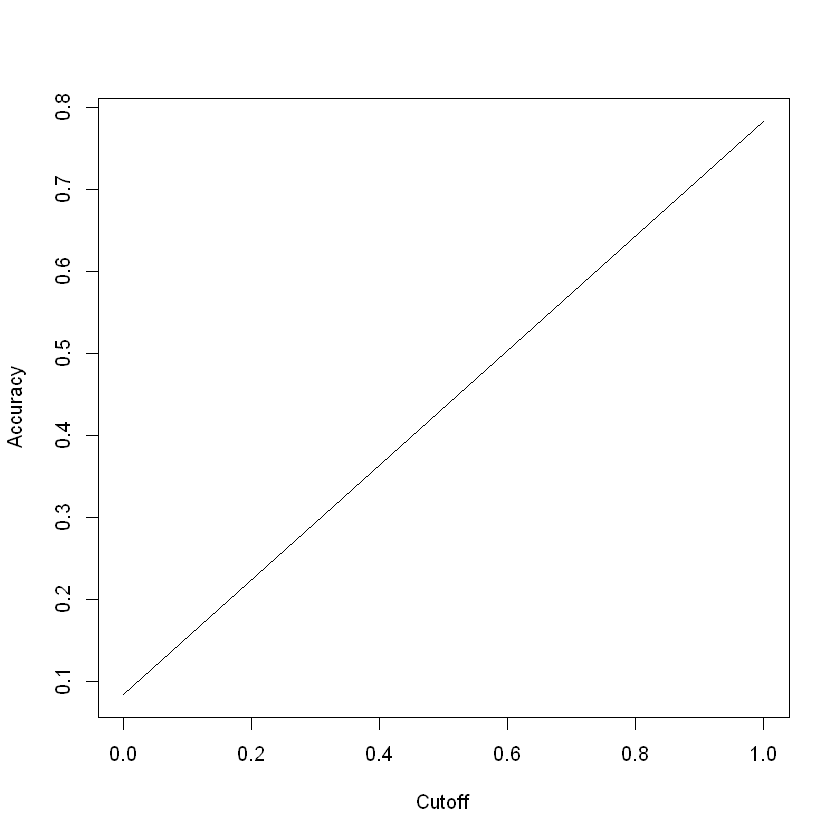

In [28]:
library(e1071)
library(ROCR)
#ACCURACY CON CUTOFF
prediction_tweets<-prediction(predicted_values,toxicTest$toxic)
perf<-performance(prediction_tweets,"acc")
plot(perf)
title('ACCURACY')

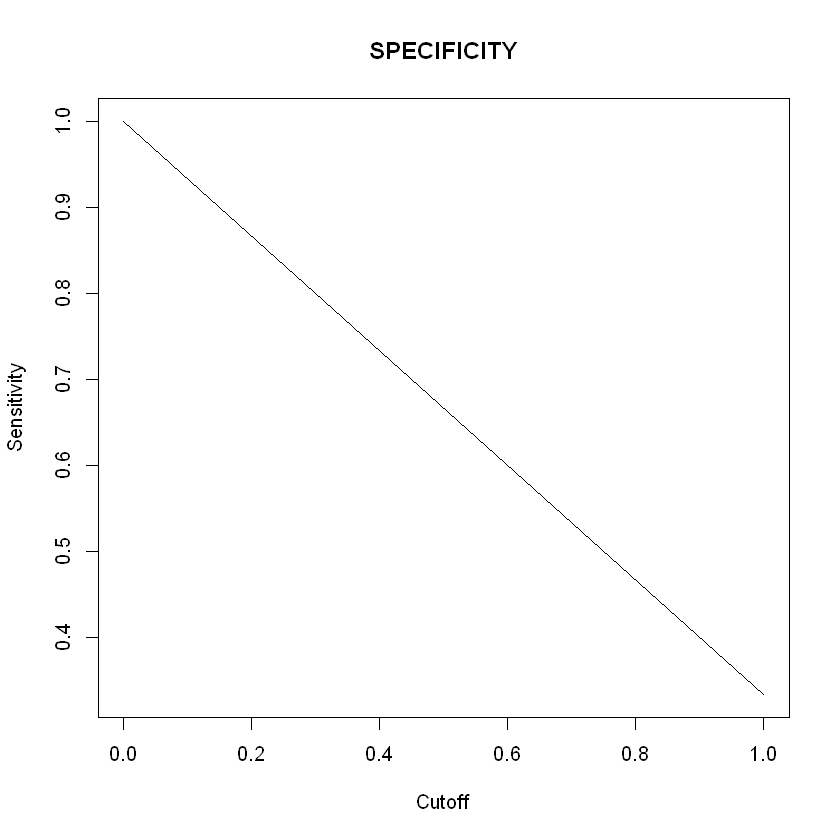

In [62]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweets,"sens")
plot(perf2)
title('SENSITIVITY')

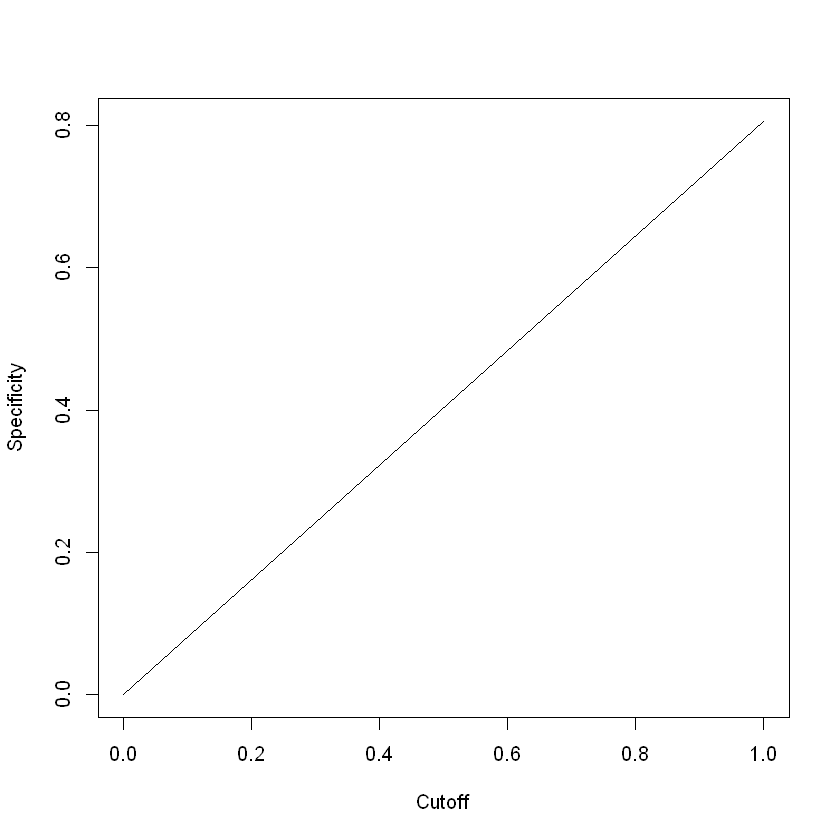

In [32]:

#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweets,"spec")
plot(perf3)
title('SPECIFICITY')

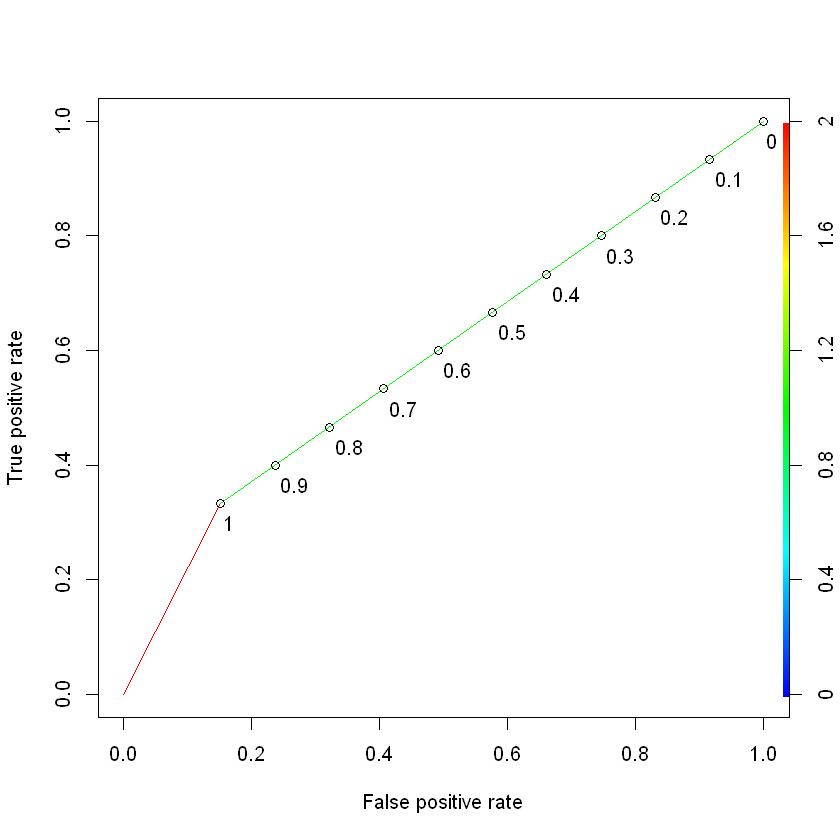

In [54]:
#CURVA ROC
perf4<-performance(prediction_tweets,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

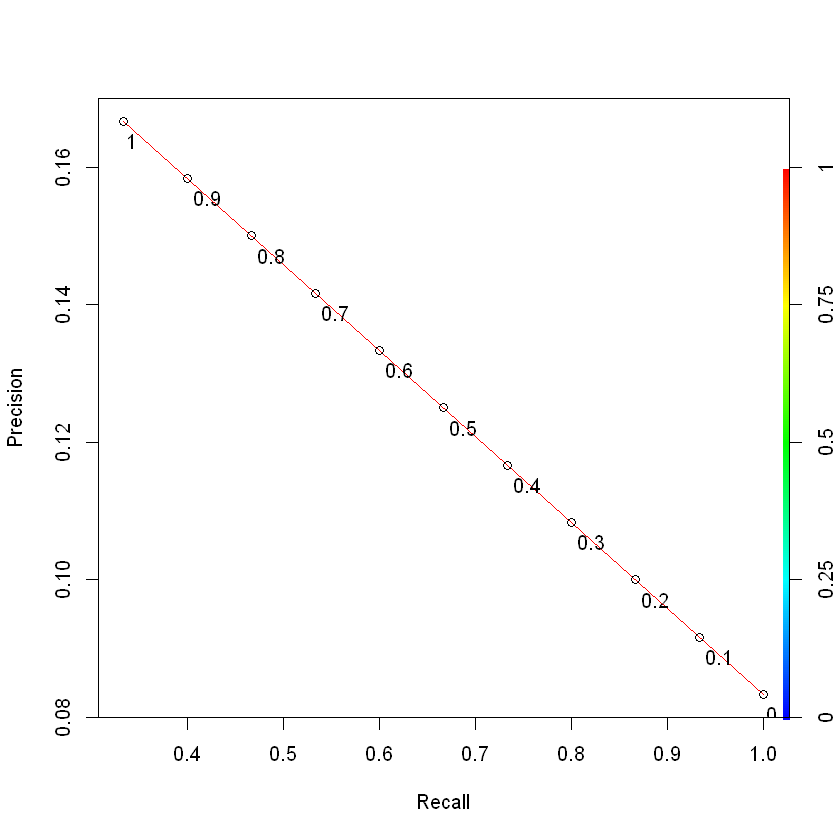

In [61]:
#Curva AUC
ROCRrec <- performance(prediction_tweets, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

## Ridge Regression
### Se realizara una comparacion entre el modelo lineal y aquella con ridge regression para mostrar las diferencias del mismo

In [51]:
#Modelo con Ridge Regression
lmMod <- lm(toxic ~ mentions + sentiment + num_bad_words, toxicTrain)  # the linear reg model
summary (lmMod) # get summary
predicted <- ifelse(predict (lmMod, toxicTrain)>.1,1,0)  # predict on test data
conf_matrix<-table(predicted,toxicTrain$toxic)
print('TRAIN')
print('Matriz de confusion')
conf_matrix
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value
print('Error del modelo')
1-accuracy_value
predicted <- ifelse(predict (lmMod, toxicTest)>.1,1,0)  # predict on test data
conf_matrix<-table(predicted,toxicTest$toxic)
print('TEST')
print('Matriz de confusion')
conf_matrix
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value
print('Error del modelo')
1-accuracy_value
library(ridge)


Call:
lm(formula = toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21689 -0.08446 -0.07610 -0.05939  0.98873 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.084463   0.021891   3.858 0.000132 ***
mentions      -0.008359   0.011338  -0.737 0.461415    
sentiment      0.116315   0.069269   1.679 0.093869 .  
num_bad_words  0.046928   0.021540   2.179 0.029919 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2753 on 416 degrees of freedom
Multiple R-squared:  0.0173,	Adjusted R-squared:  0.01021 
F-statistic: 2.441 on 3 and 416 DF,  p-value: 0.06386


[1] "Matriz de confusion"


         
predicted   0   1
        0 299  16
        1  86  19

[1] "Accuracy del modelo"


[1] 0.7571429

[1] "Error del modelo"


[1] 0.2428571

[1] "Matriz de confusion"


         
predicted   0   1
        0 128   5
        1  37  10

[1] "Accuracy del modelo"


[1] 0.7666667

[1] "Error del modelo"


[1] 0.2333333

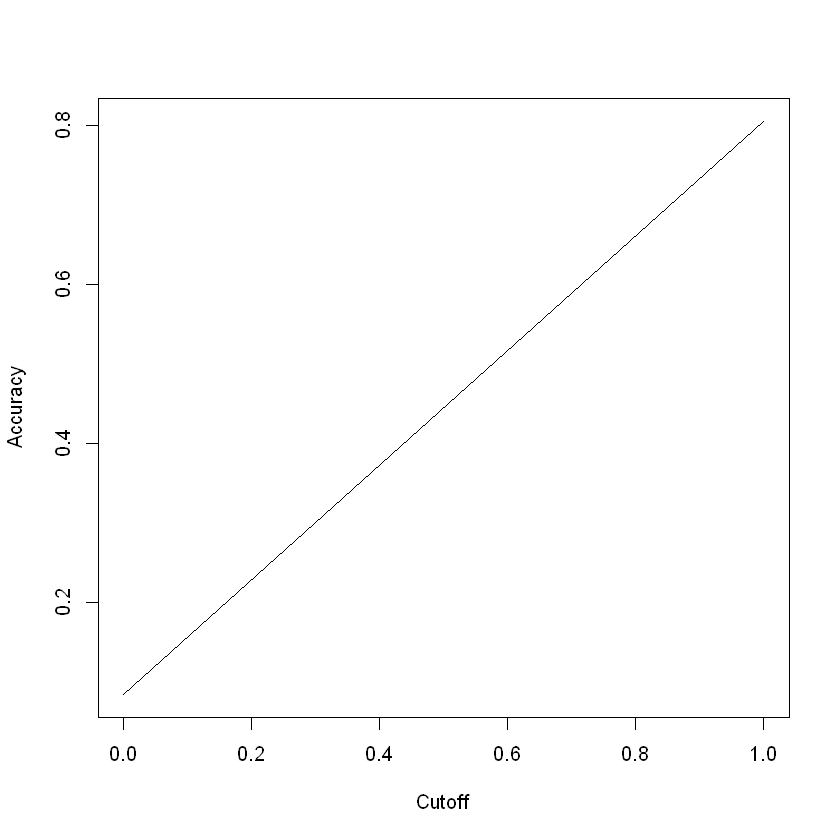

In [36]:
#ACCURACY CON CUTOFF
prediction_tweetsm2<-prediction(predicted,toxicTest$toxic)
perf<-performance(prediction_tweetsm2,"acc")
plot(perf)
title('ACCURACY')


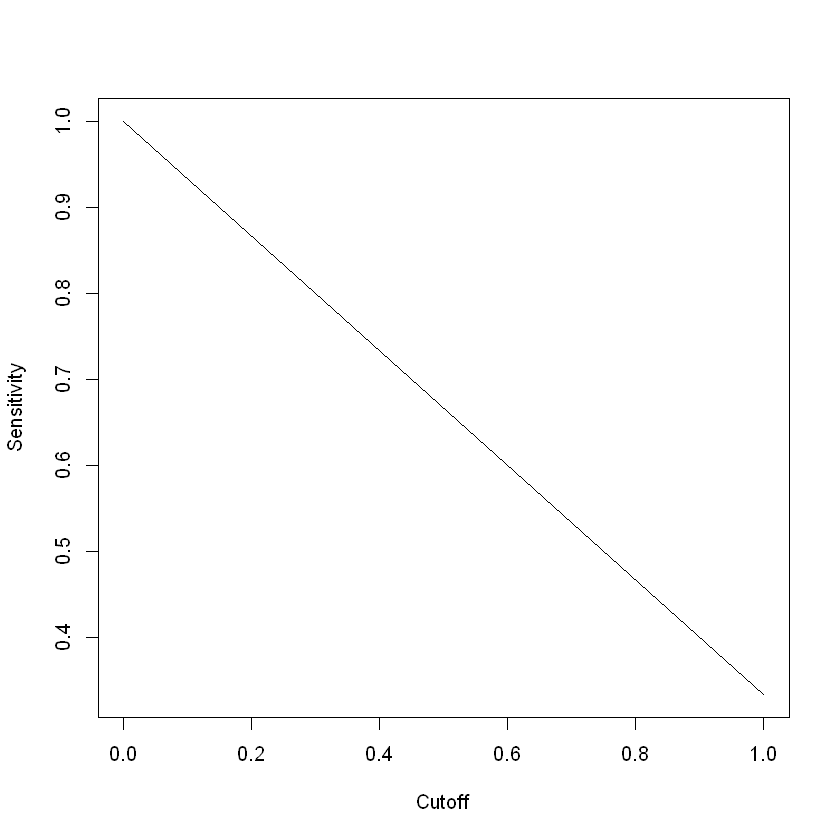

In [37]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsm2,"sens")
plot(perf2)
title('SENSITIVITY')

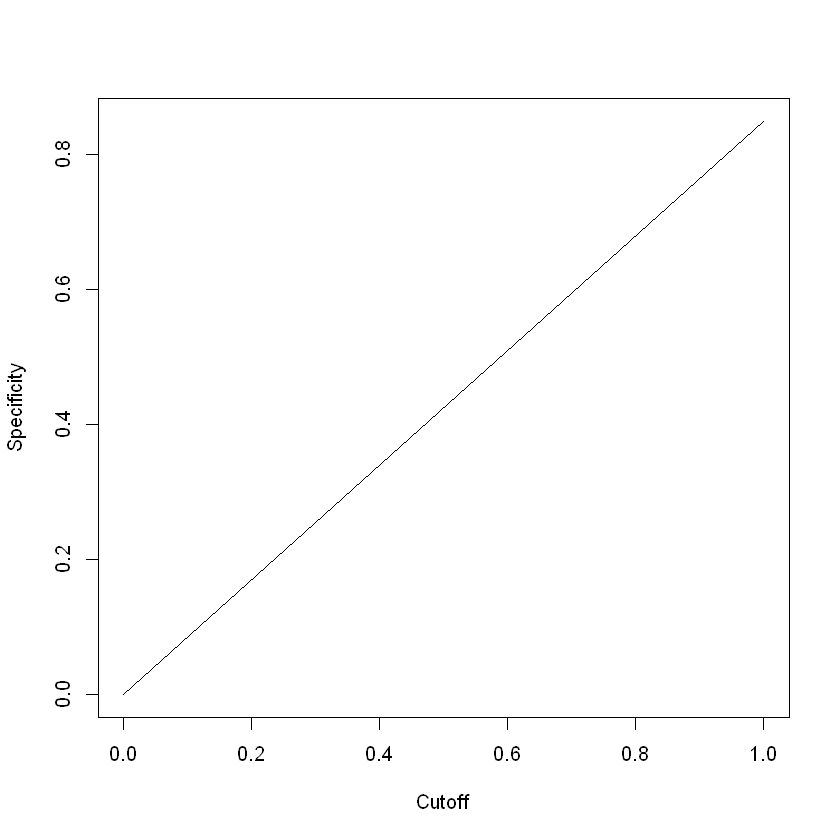

In [38]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsm2,"spec")
plot(perf3)
title('SPECIFICITY')

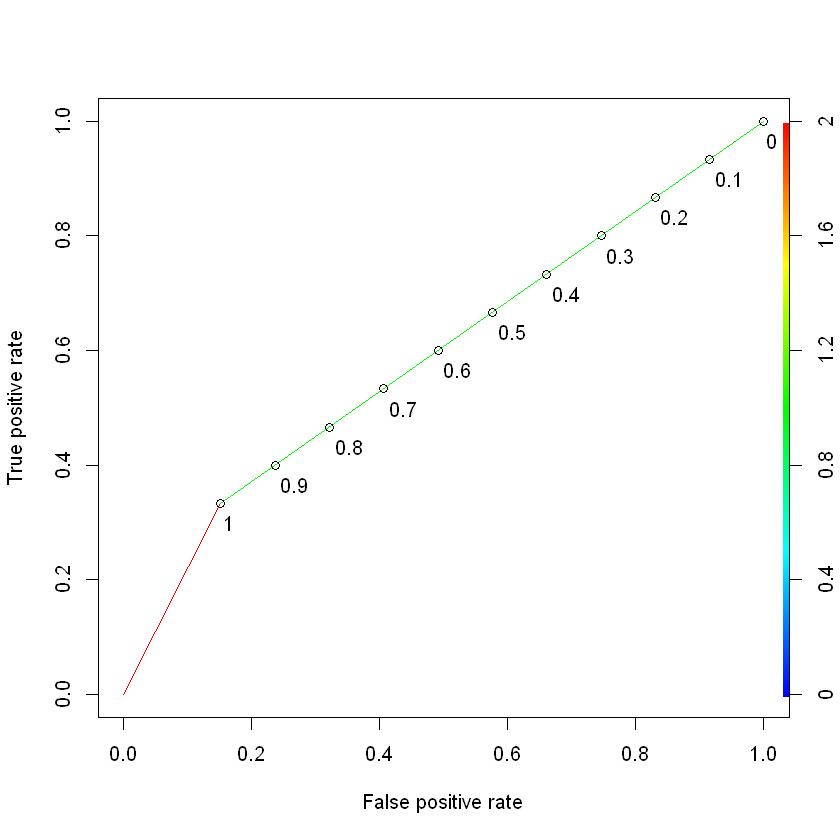

In [55]:
#CURVA ROC
perf4<-performance(prediction_tweetsm2,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

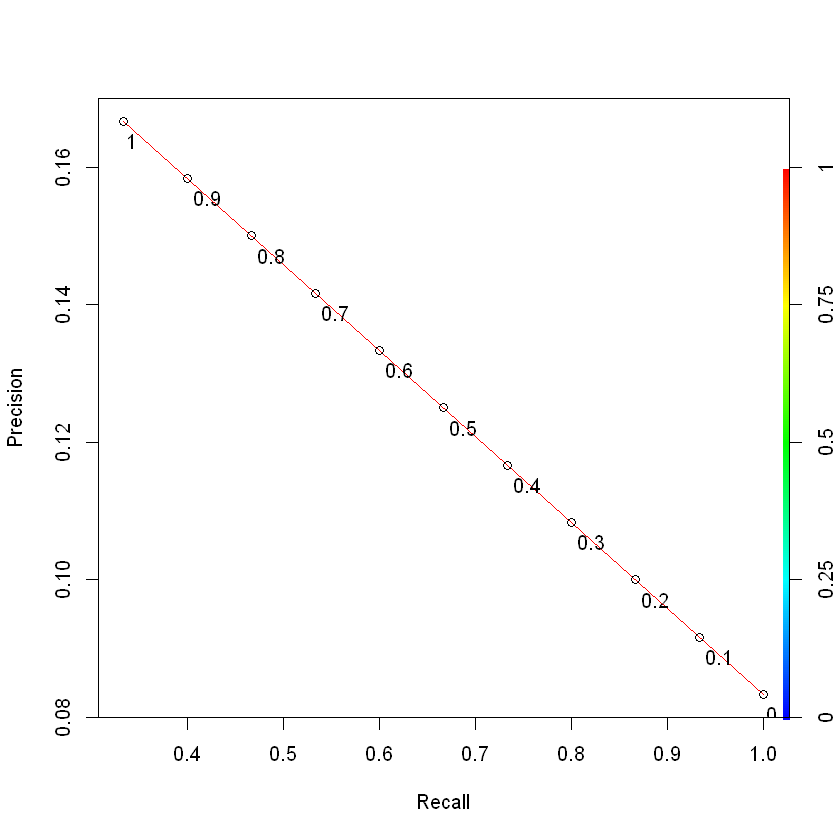

In [60]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsm2, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

### Comparando el modelo lineal con Ridge Regression

In [53]:
linRidgeMod <- linearRidge(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain)
predicted <- ifelse(predict(linRidgeMod, toxicTrain)>.1,1,0)
conf_matrix<-table(predicted,toxicTrain$toxic)
print('TRAIN')
print('Matriz de confusion con ridge regression')
conf_matrix
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value
print('Error del modelo')
1-accuracy_value
predicted <- ifelse(predict(linRidgeMod, toxicTest)>.1,1,0)
conf_matrix<-table(predicted,toxicTest$toxic)
print('TEST')
print('Matriz de confusion con ridge regression')
conf_matrix
accuracy_value<-(conf_matrix[1,1]+conf_matrix[2,2])/(conf_matrix[1,1]+conf_matrix[2,2]+conf_matrix[1,2]+conf_matrix[2,1])
print('Accuracy del modelo')
accuracy_value
print('Error del modelo')
1-accuracy_value

[1] "TRAIN"
[1] "Matriz de confusion con ridge regression"


         
predicted   0   1
        0 319  21
        1  66  14

[1] "Accuracy del modelo"


[1] 0.7928571

[1] "Error del modelo"


[1] 0.2071429

[1] "TEST"
[1] "Matriz de confusion con ridge regression"


         
predicted   0   1
        0 140  10
        1  25   5

[1] "Accuracy del modelo"


[1] 0.8055556

[1] "Error del modelo"


[1] 0.1944444

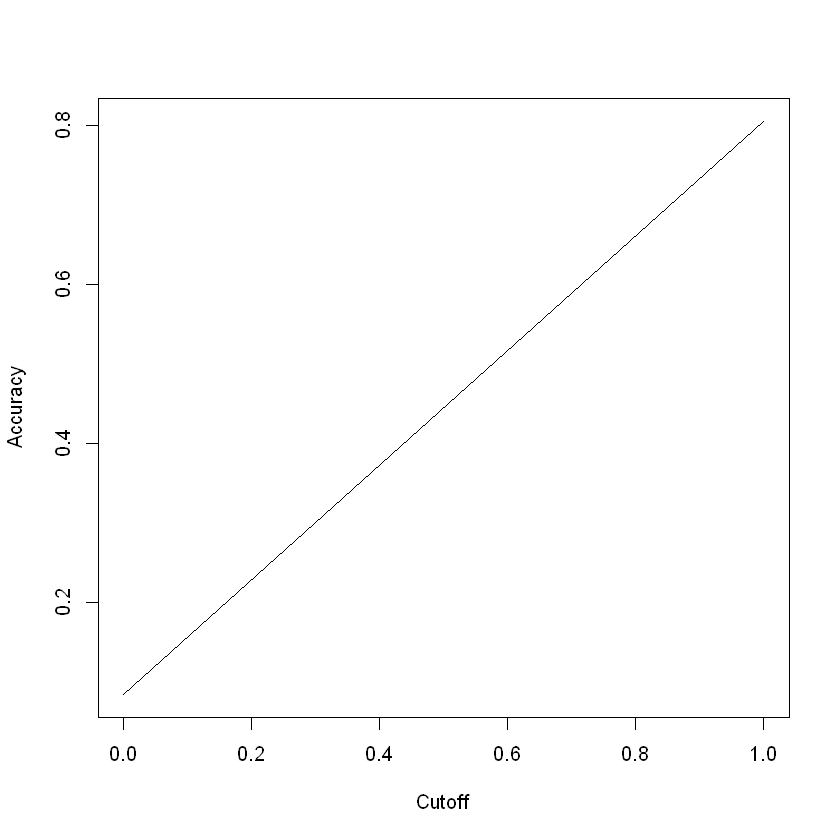

In [41]:
#ACCURACY CON CUTOFF
prediction_tweetsrr<-prediction(predicted,toxicTest$toxic)
perf<-performance(prediction_tweetsrr,"acc")
plot(perf)
title('ACCURACY')

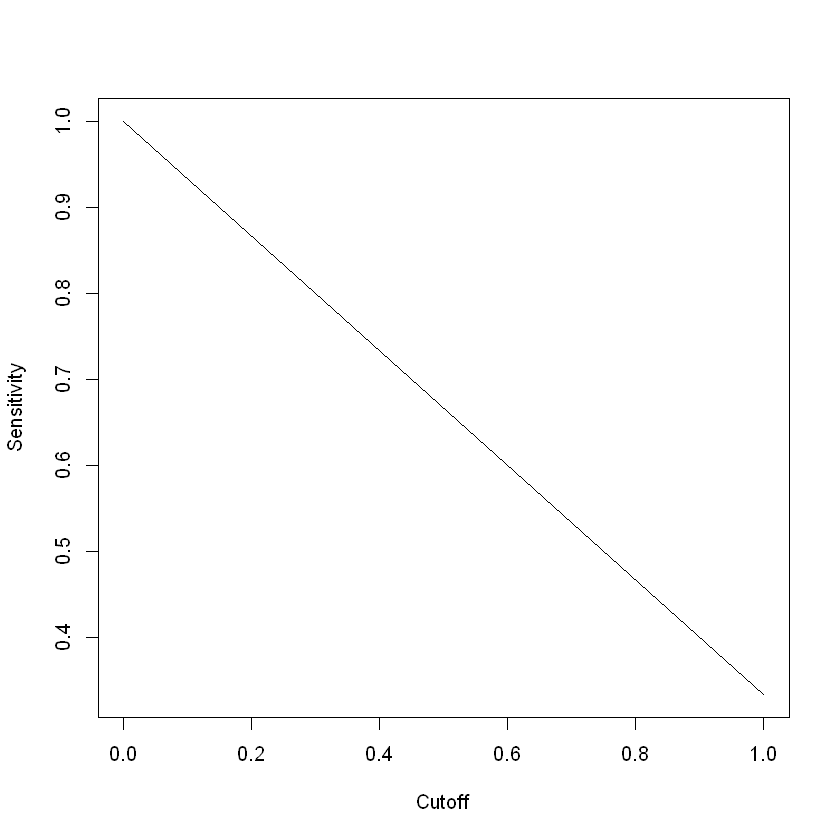

In [42]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsrr,"sens")
plot(perf2)
title('SENSITIVITY')

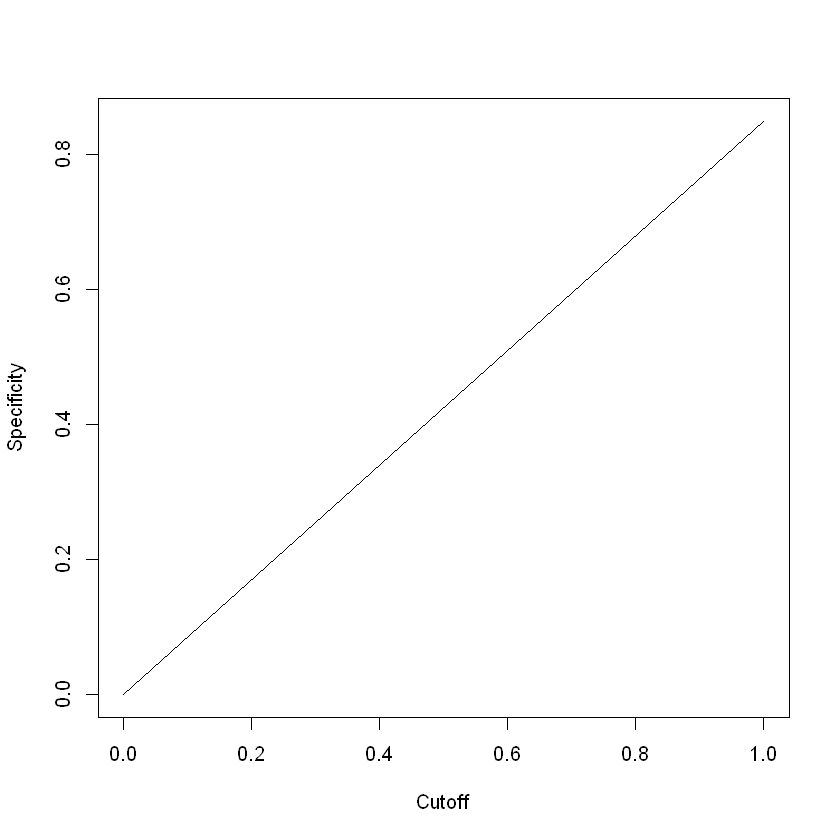

In [43]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsrr,"spec")
plot(perf3)
title('SPECIFICITY')

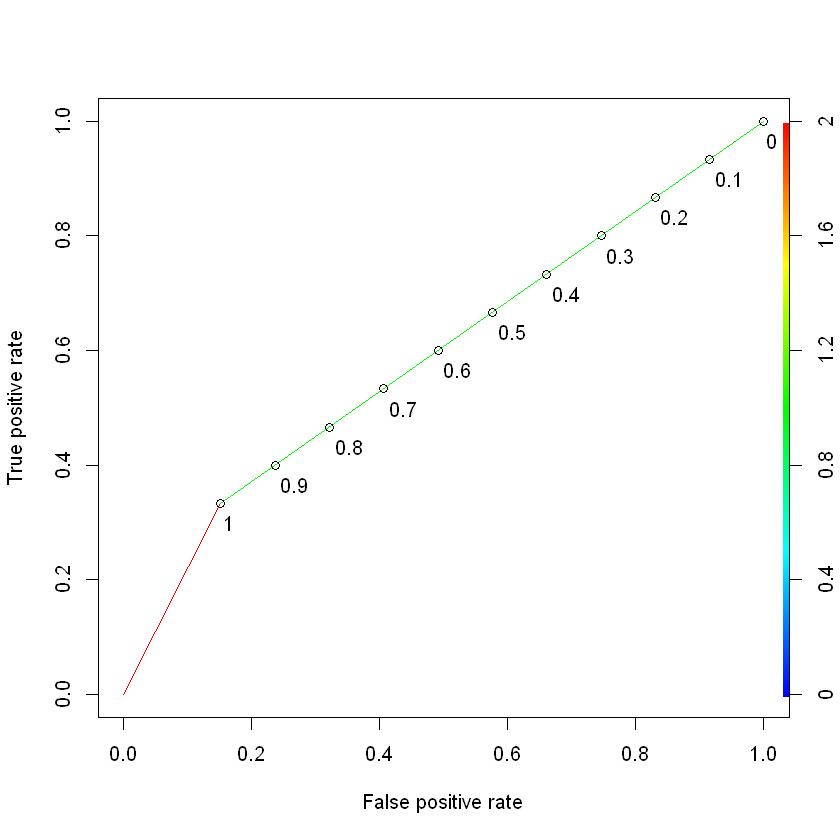

In [56]:
#CURVA ROC
perf4<-performance(prediction_tweetsrr,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

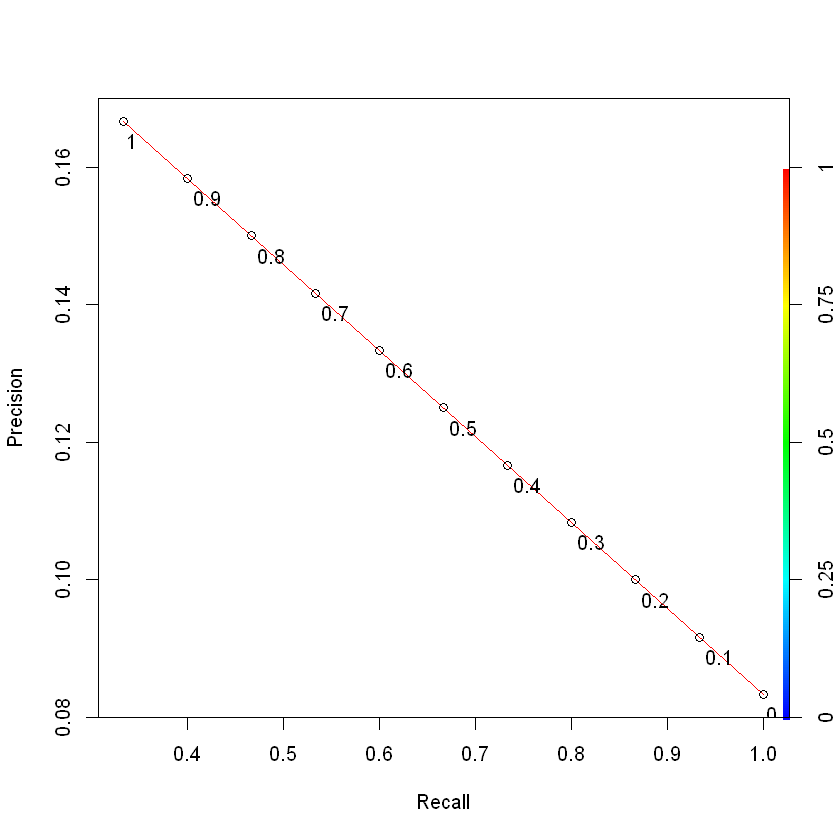

In [59]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsrr, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')

## Random Forest
### Random Forest es uno de esos algoritmos de aprendizaje automático de conjuntos muy potentes que funciona creando múltiples árboles de decisión y luego combinando la salida generada por cada uno de los árboles de decisión. Por ende es mucho mas efectivo que el decision tree que tiene un aprendizaje bajo, por lo que este modelo nos ayudara a obtener un mejor desempeño de nuestro modelo

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

[1] "Primer modelo sin el número de nodos definidos"



Call:
 randomForest(formula = toxic ~ mentions + sentiment + num_bad_words,      data = toxicTrain, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.06881921
                    % Var explained: 9.91

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

[1] "Segundo modelo con el número de nodos definidos"



Call:
 randomForest(formula = toxic ~ mentions + sentiment + num_bad_words,      data = toxicTrain, ntree = 20, mtry = 2, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 20
No. of variables tried at each split: 2

          Mean of squared residuals: 0.06716737
                    % Var explained: 12.07

[1] "Matriz de confusion de Random forest"


         
predTrain   0   1
        0 336  11
        1  49  24

[1] "Accuracy de Random forest"


[1] 0.8571429

[1] "Error de Random forest"


[1] 0.1428571

[1] "Accuracy de Random forest"


[1] 0.8

[1] "Error de Random forest"


[1] 0.2

[1] "Matriz de confusion de Random forest"


         
predValid   0   1
        0 137   8
        1  28   7

,%IncMSE,IncNodePurity
mentions,0.5213988,1.807769
sentiment,7.7240987,3.704042
num_bad_words,10.3331778,3.659935


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"Warning message

[1] 0.7944444 0.8000000 0.7944444 0.8000000 0.7944444 0.8000000

[1] "Número de nodos donde la ganancia es máxima"


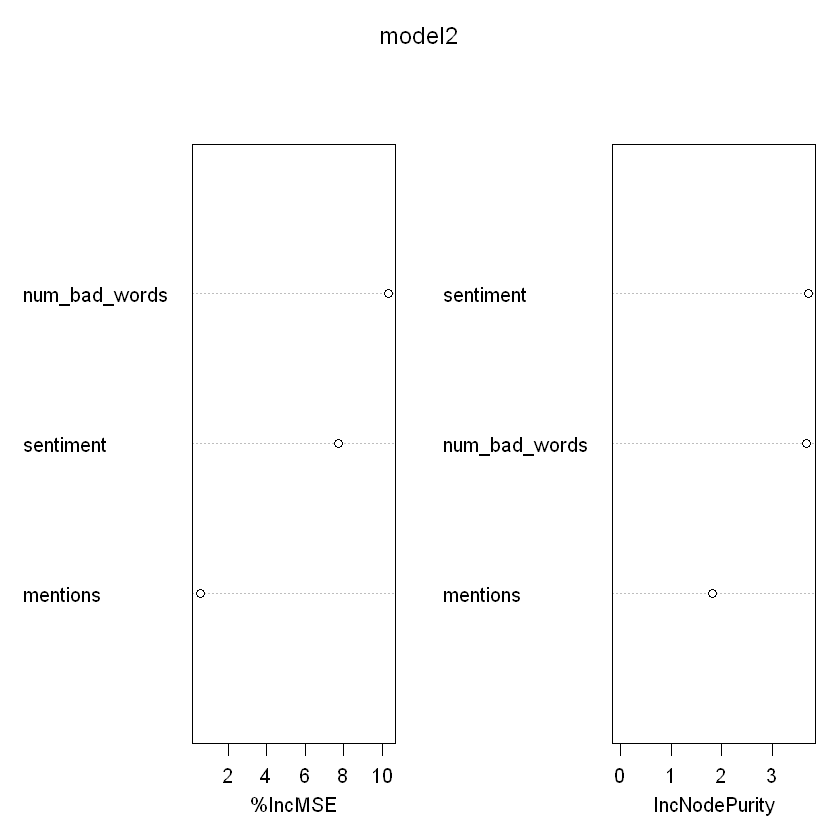

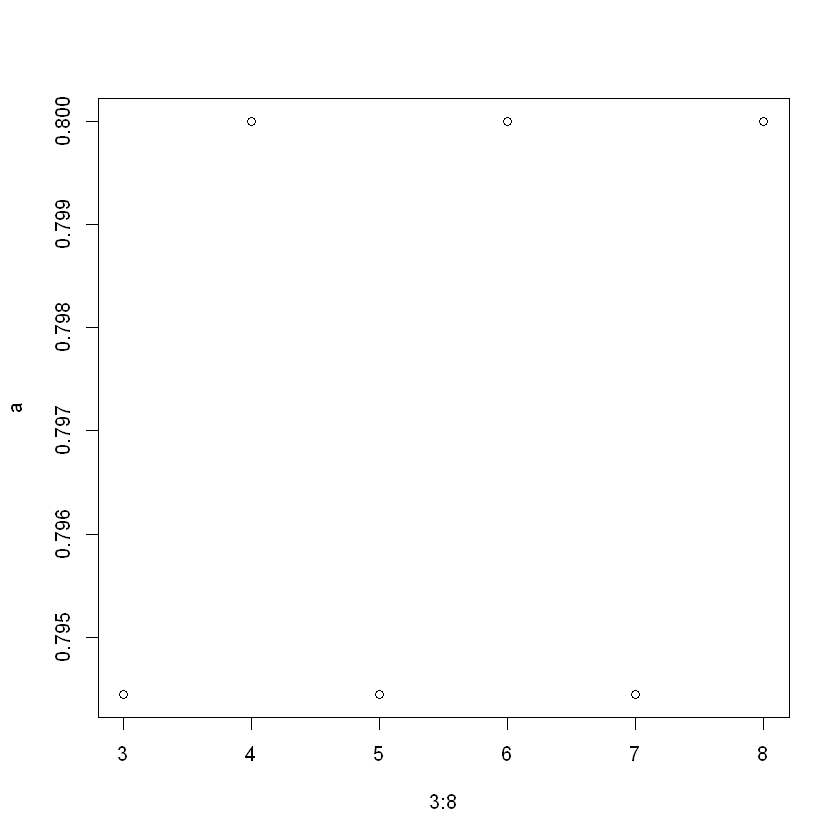

In [13]:
#Random Forest Model
library(dplyr)
library(randomForest)
model1 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, importance = TRUE)
print('Primer modelo sin el número de nodos definidos')
model1
model2 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, ntree = 20, mtry = 2, importance = TRUE)

print('Segundo modelo con el número de nodos definidos')
model2
#Predicting on train set
predTrain <- ifelse(predict(model2, toxicTrain, type = "class")>.1,1,0)
# Checking classification accuracy
print('TRAIN')
print('Matriz de confusion de Random forest')
table(predTrain, toxicTrain$toxic)
print('Accuracy de Random forest')
mean(predTrain == toxicTrain$toxic) 
print('Error de Random forest')
1-mean(predTrain == toxicTrain$toxic) 
# Predicting on Validation set
predValid <- ifelse(predict(model2, toxicTest, type = "class")>.1,1,0)
print('TEST')
# Checking classification accuracy
print('Accuracy de Random forest')
mean(predValid == toxicTest$toxic)
print('Error de Random forest')
1-mean(predValid == toxicTest$toxic)
print('Matriz de confusion de Random forest')
table(predValid,toxicTest$toxic)
importance(model2)        
varImpPlot(model2)  
a=c()
i=5
for (i in 3:8) {
  model3 <- randomForest(toxic ~ mentions + sentiment + num_bad_words, data = toxicTrain, ntree = 500, mtry = i, importance = TRUE)
  predValid <- ifelse(predict(model3, toxicTest, type = "class")>.1,1,0)
  a[i-2] = mean(predValid == toxicTest$toxic)
}
 
a
print('Número de nodos donde la ganancia es máxima')
plot(3:8,a)

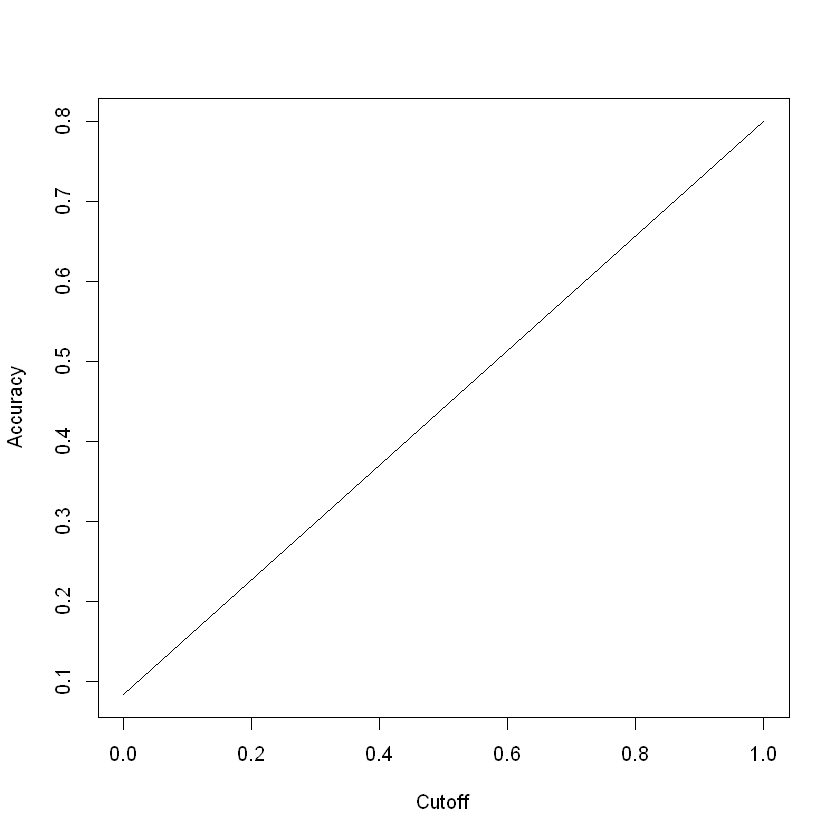

In [46]:
#ACCURACY CON CUTOFF
prediction_tweetsrf<-prediction(predValid,toxicTest$toxic)
perf<-performance(prediction_tweetsrf,"acc")
plot(perf)
title('ACCURACY')

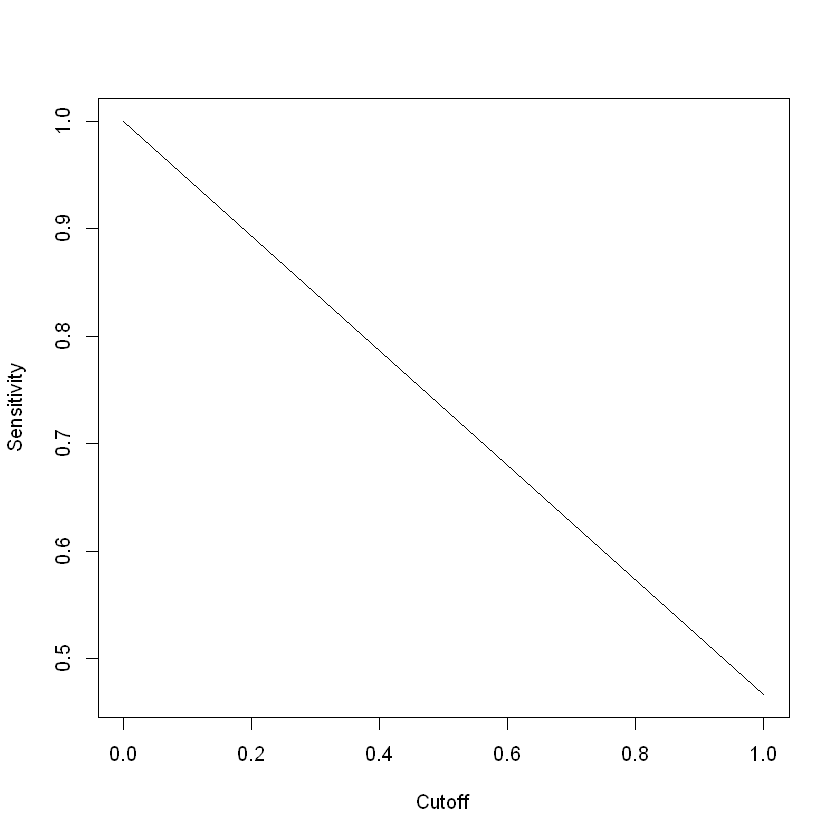

In [47]:
#SENSITIVITY CON CUTOFF
perf2<-performance(prediction_tweetsrf,"sens")
plot(perf2)
title('SENSITIVITY')

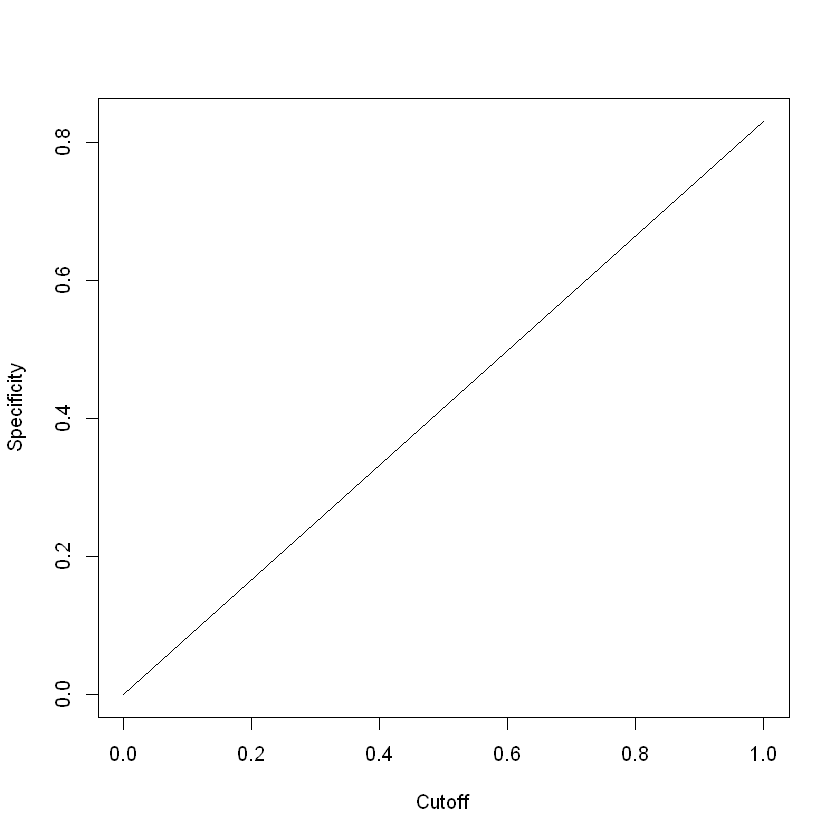

In [48]:
#SPECIFICITY CON CUTOFF
perf3<-performance(prediction_tweetsrf,"spec")
plot(perf3)
title('SPECIFICITY')

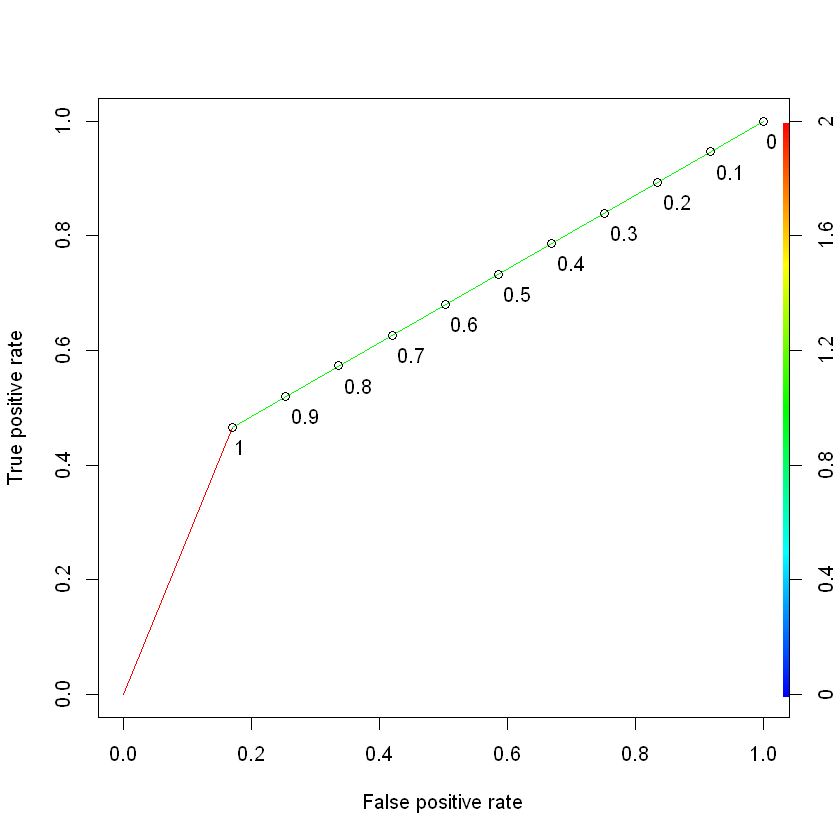

In [57]:
#CURVA ROC
perf4<-performance(prediction_tweetsrf,"tpr","fpr")
plot(perf4, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('ROC CURVE')

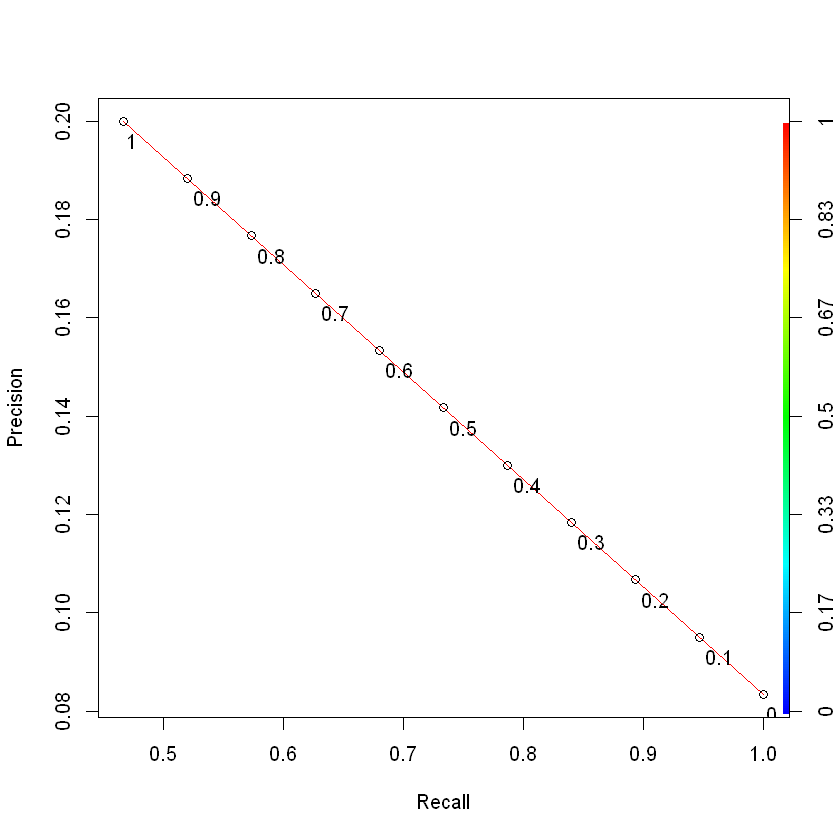

In [58]:
#Curva AUC
ROCRrec <- performance(prediction_tweetsrf, measure = "prec", x.measure = "rec")
plot(ROCRrec, colorize = TRUE, text.adj = c(-0.2,1.7), print.cutoffs.at = seq(0,1,0.1))
title('AUC CURVE')